In [38]:
#MAT345 Project 1
#Fall 2023
#Braedan Nevers, Jasmine Widgery


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [40]:
dataFrame = pd.read_excel('rollingsales_brooklyn.xls', header = 4)
#print(dataFrame)

In [41]:
#Clean up data here-- sort through each column, looking for outliers, missing data, and otherwise unecessary data points.
#Drop columns that don't tell us anything useful
to_drop = ['BOROUGH', #We already have neighborhood-- this is redundant
           'BLOCK', #Doesn't tell us anything useful
           'LOT', #Doesn't tell us anything useful
           'EASE-MENT', #I don't even know what this is
           'BUILDING CLASS AT PRESENT', #I don't even know what this is
           'ADDRESS', #We already have neighborhood-- this is redundant
           'APARTMENT NUMBER', #Doesn't tell us anything useful
           'ZIP CODE', #We already have neighborhood-- this is redundant
           'BUILDING CLASS AT TIME OF SALE', #I don't even know what this is
          ]
dataFrame.drop(columns=to_drop, inplace=True, axis=1)
#print(dataFrame)

In [42]:
#Removing rows with weird values 
dataFrame = dataFrame.replace(r"^ +| +$", r"", regex=True)
Filter = dataFrame['SALE PRICE'] > 100000 #Remove all values that 'sold' for less than 100,000 dollars
dataFrame = dataFrame[Filter]
Filter = dataFrame['SALE PRICE'] < 1000000 #Remove all values that 'sold' for more than 1,000,000 dollars
dataFrame = dataFrame[Filter]

badNeighborhoods = ['BROOKLYN HEIGHTS', 'COBBLE HILL-WEST', 'COBBLE HILL', 'DOWNTOWN-FULTON FERRY', 'DOWNTOWN-FULTON MALL']
dataFrame = dataFrame[~dataFrame.NEIGHBORHOOD.isin(badNeighborhoods)] #Remove neighborhoods that occur less than five times

Filter = dataFrame['YEAR BUILT'] > 1899 #Remove all rows before 1900
dataFrame = dataFrame[Filter]
Filter = (dataFrame['LAND SQUARE FEET'] > 0) #Remove all 0 squre feet
dataFrame = dataFrame[Filter]
Filter = dataFrame['GROSS SQUARE FEET'] > 0 #^see previous
dataFrame = dataFrame[Filter]
Filter = dataFrame['TOTAL UNITS'] > 0 #Something should have been should
dataFrame = dataFrame[Filter]
#print(dataFrame)


#dataFrame.to_excel('out.xlsx', index=False)
cleanDf = dataFrame#pd.read_excel('out.xlsx')
cleanDf = cleanDf.replace(r"^ +| +$", r"", regex=True)
#print(cleanDf)

In [43]:
#Data Visualization part A

#bar graph - Neighborhood vs Avg Price
#Pie chart - building class category per neighborhood
#plot - year built vs neighborhood


neighborhoods = []
neighborhoodPriceAvgs = []

#Create list of neighborhoods
for index, row in cleanDf.iterrows():
    if row['NEIGHBORHOOD'] not in neighborhoods: 
        neighborhoods.append(row['NEIGHBORHOOD'])
#print(neighborhoods)
#print(len(neighborhoods))

allDfs = []
for n in neighborhoods:
    grouped = cleanDf.groupby('NEIGHBORHOOD')
    nDf = grouped.get_group(n)
    allDfs.append(nDf)


pairs = []
for df in allDfs:
    name = df['NEIGHBORHOOD'].iloc[0]
    mean = round(df['SALE PRICE'].mean(), 2)
    median = round(df['SALE PRICE'].median(), 2)
    r = df['SALE PRICE'].max() - df['SALE PRICE'].min()
    rnge = round(r,  2)
    stdv = round(df['SALE PRICE'].std(), 2)
    avgYear = round(df['YEAR BUILT'].mean())
    pairs.append([name, mean])
    pairs.append([name, 'Mean:', mean, 'Median:', median, 'Range:', rnge, 'Standard Deviation:', stdv])
 #   bcDf = df['BUILDING CLASS CATEGORY'].value_counts()
    #bcDf.plot(kind='pie', y='NEIGHBORHOOD', title = name)
 #   fig1 = plt.gcf()
#    plt.show()
    #plt.draw()
   # imgname = 'Pie_' + name
    #fig1.savefig(imgname, dpi=100, bbox_inches='tight')

#for p in pairs:
    #print(p)
    
'''NEIGHBORHOOD VS YEAR BUILT SCATTER'''
#cleanDf.plot(kind='scatter', x = 'YEAR BUILT', y='NEIGHBORHOOD', title = 'Year Built vs Neighborhood', fontsize = 5, s = 10, figsize = (10, 10))
#fig1 = plt.gcf()
#plt.show()
#plt.draw()
#fig1.savefig('YearBuiltVsNeighborhood', dpi=100, bbox_inches='tight')
    
'''PLOT AVG PRICE PER NEIGHBORHOOD'''
# sort in-place from highest to lowest
#pairs.sort(key=lambda x: x[1], reverse=True) 

'''
# save the names and their respective prices separately
# reverse the tuples to go from most frequent to least frequent 
neighborhood = list(zip(*pairs))[0]
avgPrice = list(zip(*pairs))[1]
x_pos = np.arange(len(neighborhood)) 

  
plt.bar(x_pos, avgPrice, align='edge', width = 0.5)
plt.xticks(x_pos, neighborhood, rotation = 'vertical', fontsize = 5) 
plt.ylabel('Average Price')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('UnsortedNeighborhoodVsPrice.png', dpi=100, bbox_inches='tight')
'''

"\n# save the names and their respective prices separately\n# reverse the tuples to go from most frequent to least frequent \nneighborhood = list(zip(*pairs))[0]\navgPrice = list(zip(*pairs))[1]\nx_pos = np.arange(len(neighborhood)) \n\n  \nplt.bar(x_pos, avgPrice, align='edge', width = 0.5)\nplt.xticks(x_pos, neighborhood, rotation = 'vertical', fontsize = 5) \nplt.ylabel('Average Price')\nfig1 = plt.gcf()\nplt.show()\nplt.draw()\nfig1.savefig('UnsortedNeighborhoodVsPrice.png', dpi=100, bbox_inches='tight')\n"

In [44]:
#Data visualization part B 
datesDF = cleanDf
datesDF = datesDF.sort_values(by='SALE DATE')
datesDF['MONTH'] = datesDF['SALE DATE'].dt.month

# First data to be plotted - bar graph
salesPerMonth = {} #number of sales per month, not prices or anything, just num of sales
for index, row in datesDF.iterrows():
    month = row['MONTH']
    #create map values for the neighborhood and month
    if month not in salesPerMonth:
        salesPerMonth[month] = 0
    #update count
    salesPerMonth[month] += 1   
monthsList =  ["August 2012", "September 2012", "October 2012", "November 2012",
               "December 2012", "January 2013", "February 2013", "March 2013",
               "April 2013", "May 2013", "June 2013", "July 2013"]
salesList = list(salesPerMonth.values())
#make the bar graph
'''
plt.figure(figsize=(16, 12))
plt.bar(monthsList, salesList)
plt.title(f'Properties sold from August 2012-July2013')
plt.xlabel('Months')
plt.ylabel('# of sales')
plt.xticks(rotation=45)
plt.savefig('BarPlot_SalesPerMonth.png')
plt.show()'''


"\nplt.figure(figsize=(16, 12))\nplt.bar(monthsList, salesList)\nplt.title(f'Properties sold from August 2012-July2013')\nplt.xlabel('Months')\nplt.ylabel('# of sales')\nplt.xticks(rotation=45)\nplt.savefig('BarPlot_SalesPerMonth.png')\nplt.show()"

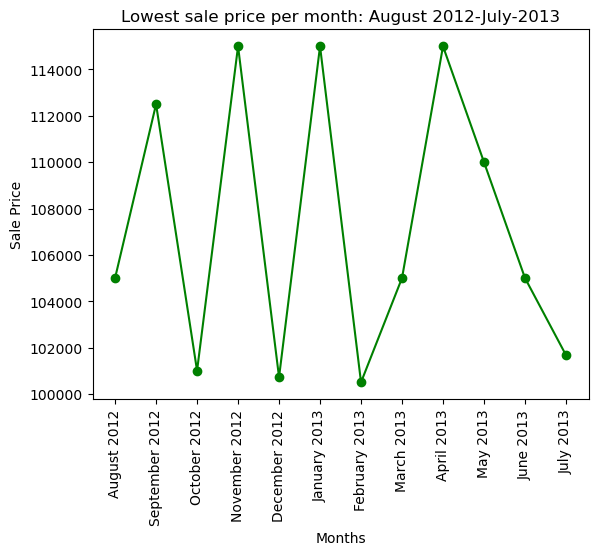

In [45]:
#second data to be plotted, timeline plot of min sale price by month
minSalePriceByMonth = {} #min sale price for each month

for index, row in datesDF.iterrows():
    month = row['MONTH']
    price = row['SALE PRICE']
    #create map values for prices and month
    if month not in minSalePriceByMonth:
        minSalePriceByMonth[month] = 1000000000
    if price < minSalePriceByMonth[month]:
        minSalePriceByMonth[month] = price

minSales = list(minSalePriceByMonth.values())
plt.title('Lowest sale price per month: August 2012-July-2013')
plt.xlabel('Months')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.plot(monthsList, minSales, label='Min Price', marker='o', linestyle='-', color='green')


<function matplotlib.pyplot.show(close=None, block=None)>

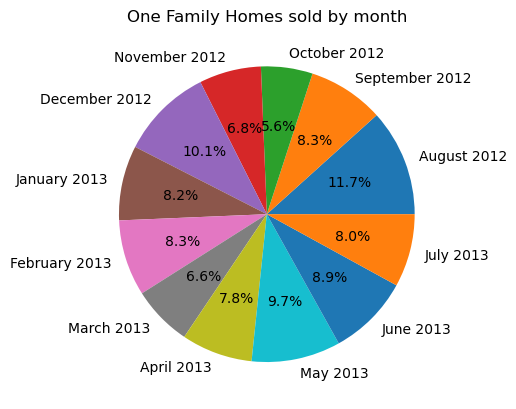

In [46]:
#Third data to be plotted: Pie chart where each slice is a month, and values
#number of "Single family homes" sold per month

#Filter out all data that's not a single family home
familyHomesDF = datesDF[datesDF['BUILDING CLASS CATEGORY'].str.contains('ONE FAMILY HOMES', case=False)]

#Get the data 
familyHomesPerMonth = {}
for index, row in familyHomesDF.iterrows():
    month = row['MONTH']
    #create map values
    if month not in familyHomesPerMonth:
        familyHomesPerMonth[month] = 0
    familyHomesPerMonth[month] += 1

#Make pie chart
homeSales = list(familyHomesPerMonth.values())
plt.pie(homeSales, labels=monthsList, autopct='%1.1f%%')
plt.title('One Family Homes sold by month')
plt.show


In [53]:
#Question 3 overall sale price, (neighborhood sale price data calculated earlier)
overallPriceRange = cleanDf['SALE PRICE'].max() - cleanDf['SALE PRICE'].min()
overallPriceMedian = cleanDf['SALE PRICE'].median()
overallPriceAverage = cleanDf['SALE PRICE'].mean()
overallPriceStandardDeviation = cleanDf['SALE PRICE'].std()

